<a href="https://colab.research.google.com/github/AlcirCastro/Inteligencia-Artificial-2o-Trabalho-Experimento-de-Aprendizado-Nao-Supervisionado/blob/main/Trabalho2_IA_Raised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
!pip install minisom

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [315]:
df = pd.read_excel("StartUpsESG_0602.xlsx")

MINISOM

In [316]:
dicio = {}
count = 0

for index, pais in enumerate(df["Country"]):
  if pais in dicio:
    # Se estiver, atribuir o valor correspondente da classe
    df.loc[index, 'Classe_Country'] = dicio[pais]
  else:
    # Se não estiver, atribuir um novo valor de classe e atualizar o dicionário
    dicio[pais] = count
    df.loc[index, 'Classe_Country'] = count
    count += 1

In [317]:
X = df.copy()

In [318]:
X = X.drop(["Country","Raised","id","StartUp","Year"],axis=1)

data = X.values


sc = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
data=sc.transform(X)

# Initialization and training
som_shape = (50, 50)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,random_seed=0,neighborhood_function='gaussian')
#som.pca_weights_init(data)
#som.random_weights_init(data)
som.train_random(data, num_iteration = 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.749256205178146


In [319]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

X["Cluster"] = cluster_index

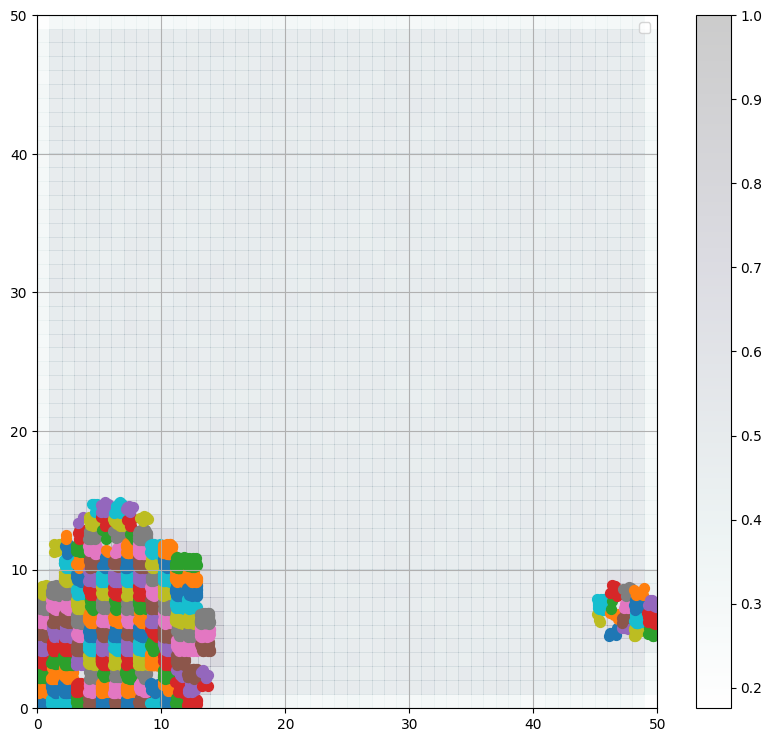

In [320]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

ar_x = []
ar_y = []
for c in np.unique(cluster_index):
#    idx_target = target==c
    coords_x = w_x[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    coords_y = w_y[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    plt.scatter(coords_x, coords_y, s=50)
    ar_x.append(coords_x[0])
    ar_y.append(coords_y[0])

for i in ar_x:
    pos = ar_x.index(i)
    #plt.text(ar_x[pos], ar_y[pos], y[pos])

plt.legend(loc='upper right')
plt.grid()

In [321]:
X["Raised"] = df["Raised"]

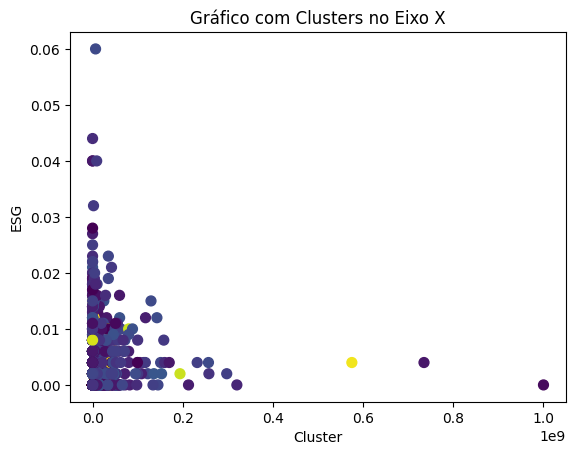

In [322]:
plt.scatter(X["Raised"],  X["ESG"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('ESG')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

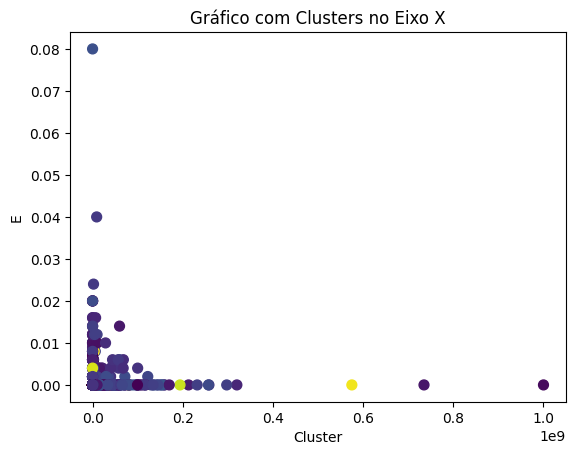

In [323]:
plt.scatter(X["Raised"],  X["E"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('E')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

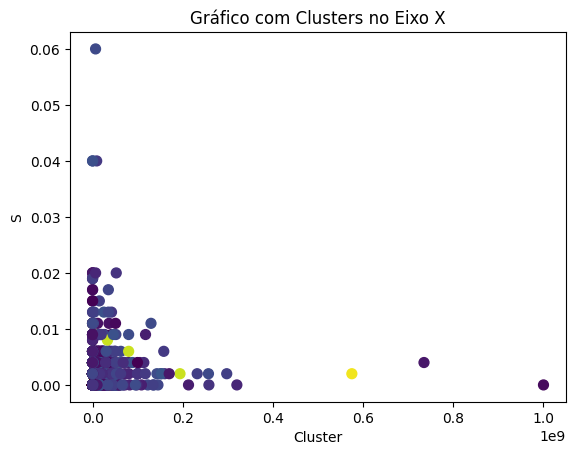

In [324]:
plt.scatter(X["Raised"],  X["S"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('S')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

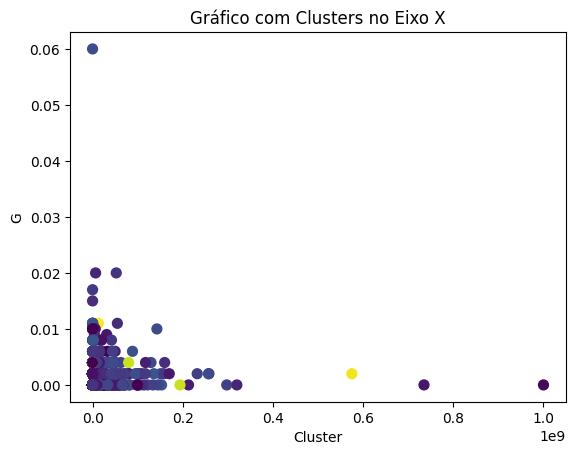

In [325]:
plt.scatter(X["Raised"],  X["G"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('G')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()